In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
a=pd.read_csv("../input/papers.csv")

In [ ]:
a

In [ ]:
a = a[a.abstract != 'Abstract Missing']

In [ ]:
a

In [ ]:
a.shape

Since we need only the abstract of the papers, Iam just slicing the dataframes

In [ ]:
a=a[["id","year","title","abstract"]]

In [ ]:
a.head()

Simply Analysing the word count of each abstract

In [ ]:
a['count'] = a['abstract'].apply(lambda x: len(str(x).split(" ")))
a[['abstract','count']].head()

In [ ]:
print(a['abstract'][941])

This descriptive analysis of wordcount in abstract proves that <br>
1.average of 148 words per abstract<br>
2.The number of words ranges from 19 to 317

In [ ]:
a.word_count.describe()

List of count of stop words need to be analysed<br>
This gives the count of all distinct words Since stop words occurs max level in a paragraph they occupies top positions


In [ ]:
common=pd.Series(' '.join(a['abstract']).split()).value_counts()[:20]
common

Uncommon words in abstract

In [ ]:
uncommon=pd.Series(' '.join(a['abstract']).split()).value_counts()[-20:]
uncommon

<h3>Text Preprocessing<h3>
1.Necesary to convert text into relevant important words
<br>
2.Decrease sparsity in vectors
<br>
3.Normalisation
->Stemming
->Lemmatisation

In [ ]:
#creating objects for stemming and lemmatization
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

In [ ]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

Stop words<br>
words that occurs frequently or commonly in abstracts + default stop words provided in python nltk library

In [ ]:
stop_words=set(stopwords.words("english"))
new_words=["using","show","result","large","also","iv","one","two","new","previously","shown"]
#this adds custom stop words->we can add common words listed above in this list
stop_words=stop_words.union(new_words)

In [ ]:
l=a.index.values.tolist()

In [ ]:
corpus=[]
for i in l:
    #Removes the punctuations from abstracts
    text=re.sub('[^a-zA-Z]',' ',a['abstract'][i])
    #Convert all the words to lower case
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    #Convert to list from string
    text=text.split()
    #Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem=WordNetLemmatizer()
    text=[lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text=" ".join(text)
    corpus.append(text)

In [ ]:
corpus[0]

<h3>Data exploration</h3>

In [ ]:
#Simple word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(background_color='white',stopwords=stop_words,max_words=100,max_font_size=50,random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

<h2>Text preparation</h2>
1.Tokenisation<br>
2.Vectorisation

In [ ]:
#Simple bag of words model
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art   718
1           neural network   561
2         machine learning   413
3               real world   376
4       learning algorithm   350
5         high dimensional   326
6              lower bound   259
7                 data set   239
8            paper propose   237
9     optimization problem   225
10         graphical model   224
11     experimental result   220
12           loss function   208
13  reinforcement learning   205
14                low rank   202
15        gradient descent   188
16        gaussian process   184
17        learning problem   180
18        convergence rate   178
19     stochastic gradient   175


[Text(0,0,'state art'),
 Text(0,0,'neural network'),
 Text(0,0,'machine learning'),
 Text(0,0,'real world'),
 Text(0,0,'learning algorithm'),
 Text(0,0,'high dimensional'),
 Text(0,0,'lower bound'),
 Text(0,0,'data set'),
 Text(0,0,'paper propose'),
 Text(0,0,'optimization problem'),
 Text(0,0,'graphical model'),
 Text(0,0,'experimental result'),
 Text(0,0,'loss function'),
 Text(0,0,'reinforcement learning'),
 Text(0,0,'low rank'),
 Text(0,0,'gradient descent'),
 Text(0,0,'gaussian process'),
 Text(0,0,'learning problem'),
 Text(0,0,'convergence rate'),
 Text(0,0,'stochastic gradient')]

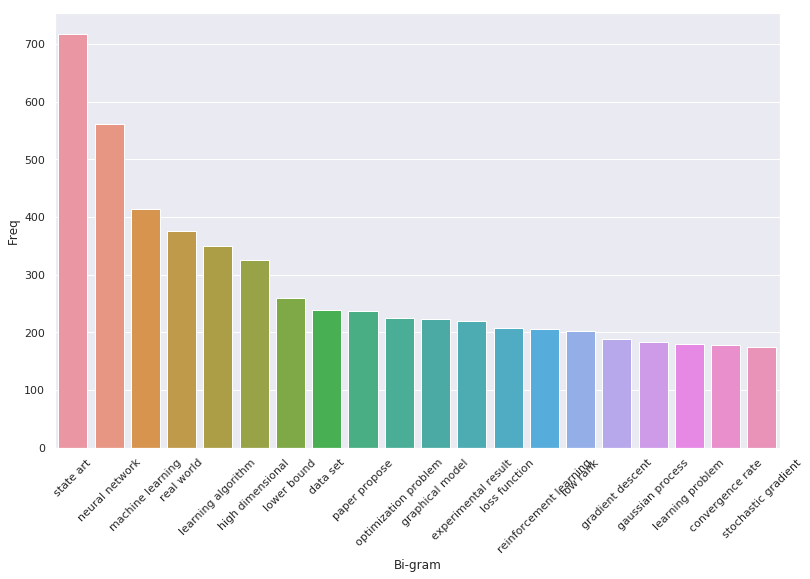

In [80]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   100
1            deep neural network    96
2    stochastic gradient descent    84
3          state art performance    82
4            real world datasets    76
5       recurrent neural network    73
6               state art method    73
7                real world data    68
8        markov decision process    63
9                low rank matrix    63
10          synthetic real world    62
11      semi supervised learning    61
12            multi armed bandit    61
13         outperforms state art    60
14              state art result    60
15         latent variable model    57
16            markov chain monte    55
17             chain monte carlo    55
18  principal component analysis    50
19   empirical risk minimization    50


[Text(0,0,'convolutional neural network'),
 Text(0,0,'deep neural network'),
 Text(0,0,'stochastic gradient descent'),
 Text(0,0,'state art performance'),
 Text(0,0,'real world datasets'),
 Text(0,0,'recurrent neural network'),
 Text(0,0,'state art method'),
 Text(0,0,'real world data'),
 Text(0,0,'markov decision process'),
 Text(0,0,'low rank matrix'),
 Text(0,0,'synthetic real world'),
 Text(0,0,'semi supervised learning'),
 Text(0,0,'multi armed bandit'),
 Text(0,0,'outperforms state art'),
 Text(0,0,'state art result'),
 Text(0,0,'latent variable model'),
 Text(0,0,'markov chain monte'),
 Text(0,0,'chain monte carlo'),
 Text(0,0,'principal component analysis'),
 Text(0,0,'empirical risk minimization')]

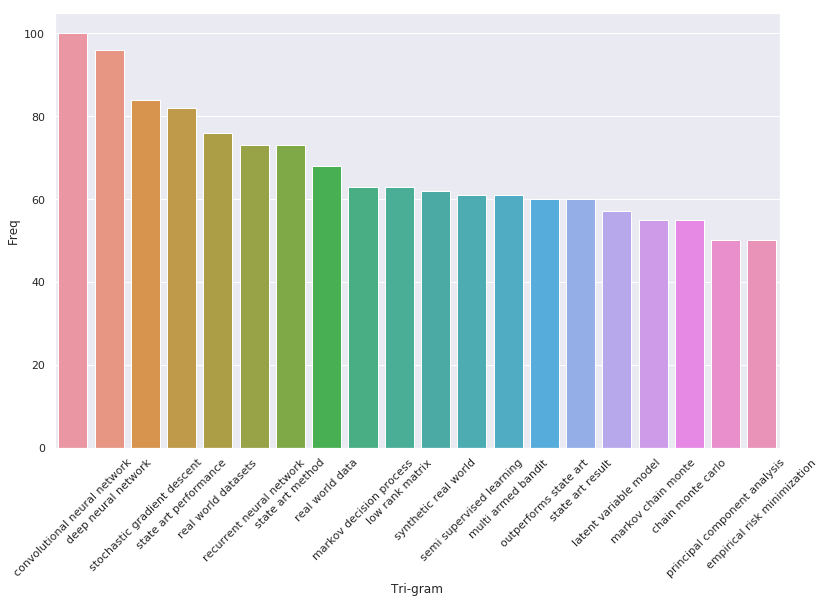

In [81]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

TF-IDF
<br>
1.Term Frequency
<br>
2.Inverse Document Frequency

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[537]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [89]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
paper study problem learning low dimensional sparse distance matrix propose novel metric learning model simultaneously conduct dimension reduction learn distance matrix sparse representation involves mixed norm regularization non convex equivalently formulated convex saddle min max problem saddle representation develop efficient smooth optimization approach sparse metric learning although learning model based non differential loss function smooth optimization approach optimal convergence rate ell smooth problem ell iteration number finally run experiment validate effectiveness efficiency sparse metric learning model various datasets

Keywords:
metric learning 0.282
smooth optimization 0.241
learning model 0.24
sparse 0.219
smooth 0.217
